<a href="https://colab.research.google.com/github/Suryaanugrah2001/BreastCancer/blob/main/Breast_cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_absolute_error as mae, r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

In [2]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [3]:
from google.colab import files
data = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/BreastCancer.csv")
data = pd.DataFrame(data)
data

,Unnamed: 0,Id,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses,Class
0,1,1000025,5,1,1,1,2,1.0,3,1,1,benign
1,2,1002945,5,4,4,5,7,10.0,3,2,1,benign
2,3,1015425,3,1,1,1,2,2.0,3,1,1,benign
3,4,1016277,6,8,8,1,3,4.0,3,7,1,benign
4,5,1017023,4,1,1,3,2,1.0,3,1,1,benign
...,...,...,...,...,...,...,...,...,...,...,...,...
694,695,776715,3,1,1,1,3,2.0,1,1,1,benign
695,696,841769,2,1,1,1,2,1.0,1,1,1,benign
696,697,888820,5,10,10,3,7,3.0,8,10,2,malignant
697,698,897471,4,8,6,4,3,4.0,10,6,1,malignant


In [4]:
data.head()

,Unnamed: 0,Id,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses,Class
0,1,1000025,5,1,1,1,2,1.0,3,1,1,benign
1,2,1002945,5,4,4,5,7,10.0,3,2,1,benign
2,3,1015425,3,1,1,1,2,2.0,3,1,1,benign
3,4,1016277,6,8,8,1,3,4.0,3,7,1,benign
4,5,1017023,4,1,1,3,2,1.0,3,1,1,benign


In [5]:
data.Class.value_counts()

benign       458
malignant    241
Name: Class, dtype: int64

In [6]:
data.isnull().sum()

Unnamed: 0          0
Id                  0
Cl.thickness        0
Cell.size           0
Cell.shape          0
Marg.adhesion       0
Epith.c.size        0
Bare.nuclei        16
Bl.cromatin         0
Normal.nucleoli     0
Mitoses             0
Class               0
dtype: int64

In [7]:
data['Bare.nuclei'].fillna(data['Bare.nuclei'].mean(),inplace=True)

In [8]:
data.isnull().sum()[data.isnull().sum()>0]

Series([], dtype: int64)

In [9]:
data = data.drop(['Unnamed: 0','Id'],axis=1)

In [10]:
data

,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses,Class
0,5,1,1,1,2,1.0,3,1,1,benign
1,5,4,4,5,7,10.0,3,2,1,benign
2,3,1,1,1,2,2.0,3,1,1,benign
3,6,8,8,1,3,4.0,3,7,1,benign
4,4,1,1,3,2,1.0,3,1,1,benign
...,...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2.0,1,1,1,benign
695,2,1,1,1,2,1.0,1,1,1,benign
696,5,10,10,3,7,3.0,8,10,2,malignant
697,4,8,6,4,3,4.0,10,6,1,malignant


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Cl.thickness     699 non-null    int64  
 1   Cell.size        699 non-null    int64  
 2   Cell.shape       699 non-null    int64  
 3   Marg.adhesion    699 non-null    int64  
 4   Epith.c.size     699 non-null    int64  
 5   Bare.nuclei      699 non-null    float64
 6   Bl.cromatin      699 non-null    int64  
 7   Normal.nucleoli  699 non-null    int64  
 8   Mitoses          699 non-null    int64  
 9   Class            699 non-null    object 
dtypes: float64(1), int64(8), object(1)
memory usage: 54.7+ KB


In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [13]:
data.Class = le.fit_transform(data.Class)

In [14]:
data.select_dtypes(include='object').columns

Index([], dtype='object')

In [15]:
data.head(3)

,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses,Class
0,5,1,1,1,2,1.0,3,1,1,0
1,5,4,4,5,7,10.0,3,2,1,0
2,3,1,1,1,2,2.0,3,1,1,0


SAMPLING

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
train_data,test_data = train_test_split(data,test_size=0.2)

In [18]:
# data didistribusikan di train datn test...original_size...train_size...test_size
print(data.shape,"  ", train_data.shape,"  ", test_data.shape)

(699, 10)    (559, 10)    (140, 10)


In [19]:
train_data_x = train_data.iloc[ : , : -1]
train_data_y = train_data.iloc[ : ,-1]

In [20]:
test_data_x = test_data.iloc[ : , :-1]
test_data_y = test_data.iloc[ : , -1]

MEMBUAT MODEL

In [21]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(train_data_x,train_data_y)

LogisticRegression()

Prediksi

In [22]:
pred = logreg.predict(test_data_x)
pred

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1])

In [24]:
from sklearn.metrics import confusion_matrix
tab = confusion_matrix(test_data_y,pred)
tab

array([[85,  2],
       [ 1, 52]])

In [25]:
Accuracy = tab.diagonal().sum()*100/tab.sum()
Accuracy

97.85714285714286

In [27]:
from sklearn.metrics import recall_score
recall_score(test_data_y,pred)*100

98.11320754716981

In [28]:
from sklearn.metrics import precision_score
precision_score(test_data_y,pred)*100

96.29629629629629

F1 SCORE

In [30]:
from sklearn.metrics import f1_score
f1_score(test_data_y,pred)*100

97.19626168224299

In [32]:
from google.colab import files
uploaded = files.upload()


Saving cancer.png to cancer.png


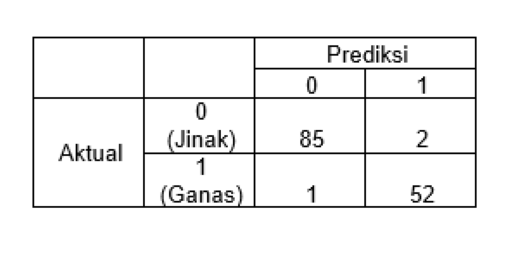

In [33]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Ganti 'nama_gambar.jpg' dengan nama gambar yang diunggah
img = mpimg.imread('cancer.png')
plt.imshow(img)
plt.axis('off')  # Untuk menghilangkan sumbu
plt.show()

Total 87 pasien hasil kanker normal dan tidak berbahaya tetapi model telah memperkirakan 2 pasien risiko tinggi kanker


Sebanyak 53 pasien mempunyai risiko tinggi terkena kanker namun dari model tersebut diperkirakan 1 pasien tidak berisiko terkena kanker


dapat dilihat dari keseluruhan model tampakbaik

In [ ]:
SEMOGA BERMANFAT !